# Cherry Blossom Race Analysis

## Abstract
FILL IN WITH A HIGH LEVEL OVERVIEW OF WHATEVER IS DONE IN THIS DOC

## Introduction
The Cherry Blossom race results were scraped from http://cherryblossom.org/ using R and code from Daniel Kaplan and Deborah Nolan in the book Data Science in R: A Case Studies Approach[1]. Extensive data cleaning was performed on the age and run times for each runner. Some problems not addressed in the book were inspected and corrected resulting in dataframes that correspond to dataframes in the book at section 2.4 save for a few records that were simply deleted. The deleted entries were those records identified to have ages less than 5.

This analysis centers on exercise 11 from [1]:
+ <strong>Q.11</strong> Normalize each male runner’s time by the fastest time for the runner of the same age. To do this, find the fastest runner for each year of age from 20 to 80. The tapply() function may be helpful here. Smooth these times using loess(), and find the smoothed time using predict(). Use these smoothed times to normalize each run time. Use density plots, quantile–quantile plots, and summary statistics to compare the distribution of the age-normalized times for the runners in 1999 and 2012. What do you find? Repeat the process for the women. Compare the women in 1999 to the women in 2012 and to the men in 1999 and 2012.

## Methods
The methods are more-or-less suggested by the problem itself. Inspection of missing ages reveals that 7 of the missing ages can be replaced with information from other years however the likely minimal impact made this a low priority and so was skipped. The data was then subset for ages 20 to 80 excluding the NA's discovered previously then the `lapply` function (rather than `tapply`) was used to get the best times for each integer age from 20 to 80 for each year from 1999 to 2012. The `lapply` resulted in a list of dataframes which were then combined into a single dataframe and then used with the `merge` function to lookup the appropriate best times for each age and year combination (overkill? problem asks for 1999 and 2012 comparison). The normalized times were smoothed using local polynomial regression fitting by way of the `loess` function.

<strong>[NOTE: THE NEXT PART SHOULD TALK ABOUT THE DENSITY PLOTS, Q-Q PLOTS, AND COMPARISON OF SUMMARY STATISTICS THAT I HAVE NOT DONE YET.]</strong>

<strong>[NOTE: THE NEXT PART SHOULD MENTION THAT THIS WAS ALSO DONE FOR THE WOMEN'S RUN TIMES WHICH I ALSO HAVE NOT DONE YET]</strong>

In [1]:
load("cbMen.rda")
load("cbWomen.rda")

In [2]:
#the book didn't address the NA ages unfortunately (not in sections 2.1 to 2.3 at least)
#i'll try to get ages by looking at runners who competed in multiple years
#also some of these look hopeless, like Runner Dx lii xviii
cbMen[is.na(cbMen$age),]

,year,sex,name,home,age,runTime
1999.1083,1999,M,Rob Faye,Vienna VA,NA,78.25000
2002.1227,2002,M,William STEIGEL,Washington DC,NA,77.70000
2002.2490,2002,M,Dave BOYER,Washington DC,NA,91.31667
2005.267,2005,M,John Marquart,Madison WI,NA,66.01667
2005.542,2005,M,Runner Dx Iii X Viii,Rockville MD,NA,69.76667
2005.925,2005,M,Runner Cb Vii Ix V,Rockville MD,NA,77.55000
2005.1158,2005,M,Runner Xx,Rockville MD,NA,78.80000
2005.1791,2005,M,Joseph Ferguson,Richmond VA,NA,86.68333
2005.2129,2005,M,Runner Bc Iii Ii O,Rockville MD,NA,87.00000
2005.3464,2005,M,Ronald Henry,Arlington VA,NA,97.16667


In [3]:
nms = as.vector(cbMen[is.na(cbMen["age"]),"name"])
inds = unlist(lapply(nms, FUN=function(x) grep(x, cbMen[,"name"]))) #also need to unlist

In [4]:
#we only get 7 unique people back, we'll just skip fixing them for now
matches = cbMen[inds,]
matches[!is.na(matches$age),]

,year,sex,name,home,age,runTime
2000.1257,2000,M,Rob Faye,Vienna VA,34,81.53333
2003.586,2003,M,John Marquart,Madison WI,46,69.60000
2004.3193,2004,M,Joseph Ferguson,Richmond VA,39,94.28333
2008.386,2008,M,Jim Catella,Washington DC,27,67.23333
2010.4302,2010,M,Unknown,,38,92.65000
2008.484,2008,M,Dan Kahn,Gaithersburg MD,42,68.73333
2009.626,2009,M,Dan Kahn,Gaithersburg MD,43,69.76667
2010.431,2010,M,Dan Kahn,Gaithersburg MD,44,67.28333
2005.134,2005,M,Bart Forsyth,Arlington VA,27,61.41667
2006.101,2006,M,Bart Forsyth,Arlington,28,59.86667


In [5]:
#from here i can overwrite the incorrect ages, i'll do it later perhaps, we'll only gain 7 though so probably not a big deal

#### Normalizing by Age by Year
The code on rdatasciences.org uses shows how to use the `tapply` function but this method neglects the use of the best times for each age within each individual year. The method below uses `lapply` and includes year.

In [6]:
#first subset to ages 20 through 80, also remove NA's for age???? even though we verified there were none
df = cbMen[((cbMen$age >= 20) & !is.na(cbMen$age) & (cbMen$age <= 80)),]
summary(df$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  20.00   30.00   37.00   38.82   46.00   80.00 

In [7]:
#use lapply to get best times by age for each year
bestTimes = lapply(unique(df$year), 
                   function(x) aggregate(df[which(df$year == x),"runTime"], by=list(df[which(df$year == x),"age"]), min))

In [8]:
#change the names of each dataframe to their year for easier referencing
names(bestTimes) = 1999:2012
for (i in 1999:2012){
    names(bestTimes[[as.character(i)]]) = c("age", "bestTime")
    bestTimes[[as.character(i)]]["year"] = i
}
bestTimes = do.call("rbind", bestTimes) #make it into a single dataframe
unique(bestTimes$year)

[1] 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012

In [9]:
df = merge(df, bestTimes, by=c("age", "year"))
tail(df)

,age,year,sex,name,home,runTime,bestTime
69359,80,2003,M,Walt Washburn,Vienna VA,96.95000,96.95000
69360,80,2004,M,Lou Lodovico,Ellwood City PA,83.40000,83.40000
69361,80,2007,M,Donald Rappaport,Washington DC,149.91667,149.91667
69362,80,2008,M,Nianxiang Xie,Rockville MD,93.98333,93.98333
69363,80,2012,M,George Yannakakis,Sparks MD,90.56667,90.56667
69364,80,2012,M,Thomas Momiyama,Silver Spring MD,112.15000,90.56667


In [10]:
#test a few values in the tail to make sure it did what we expect... it did
bestTimes[(is.element(bestTimes$year,c(2003, 2004, 2007, 2008, 2012)) & (bestTimes$age==80)),]

,age,bestTime,year
2003.58,80,96.95000,2003
2004.58,80,83.40000,2004
2007.60,80,149.91667,2007
2008.57,80,93.98333,2008
2012.57,80,90.56667,2012


In [11]:
#now add the normTime column
df["normTime"] = df["runTime"]/df["bestTime"]
head(df)

age,year,sex,name,home,runTime,bestTime,normTime
20,1999,M,Gary Rovner,Washington DC,97.01667,57.78333,1.678973
20,1999,M,Sam Hananel,Arlington VA,89.96667,57.78333,1.556966
20,1999,M,Brady Maddox,Carlisle PA,77.48333,57.78333,1.340929
20,1999,M,Nick Fede,Bear DE,59.63333,57.78333,1.032016
20,1999,M,Scott Kluckhuhn,Laurel MD,71.71667,57.78333,1.241131
20,1999,M,Michael Yonas,Washington DC,88.56667,57.78333,1.532737


#### Using `loess` to Smooth the Normalized Age
Before smoothing the distribution of the best times for each year is explored using boxplots. Figure 1 shows that the best times are pretty consistent accross the years: the fastest times almost form a straight line! Variability seems pretty consistent but the outliers seem to be decreasing overall.

Local polynomial regression (`loess`) models were produced for each of the years and the smoothed regression lines for the mean are displayed overlayed on the smooth scatter plot in figure 2. Almost every year shows a hump somewhere between ages 20 and 30 and then a gradual decline towards the older ages. The hump indicates that the average for that age is the highest when compared to the best time for that age; this appearance of the hump is likely correlated with the number of participants at that age (perhaps we'll explore this later). The target years of 1999 and 2012 show a similar story but 1999 has it's hump at a younger age than 2012, also we see that in 1999 the regression line gets much closer to 1 in the older ages than does the line in 2012.

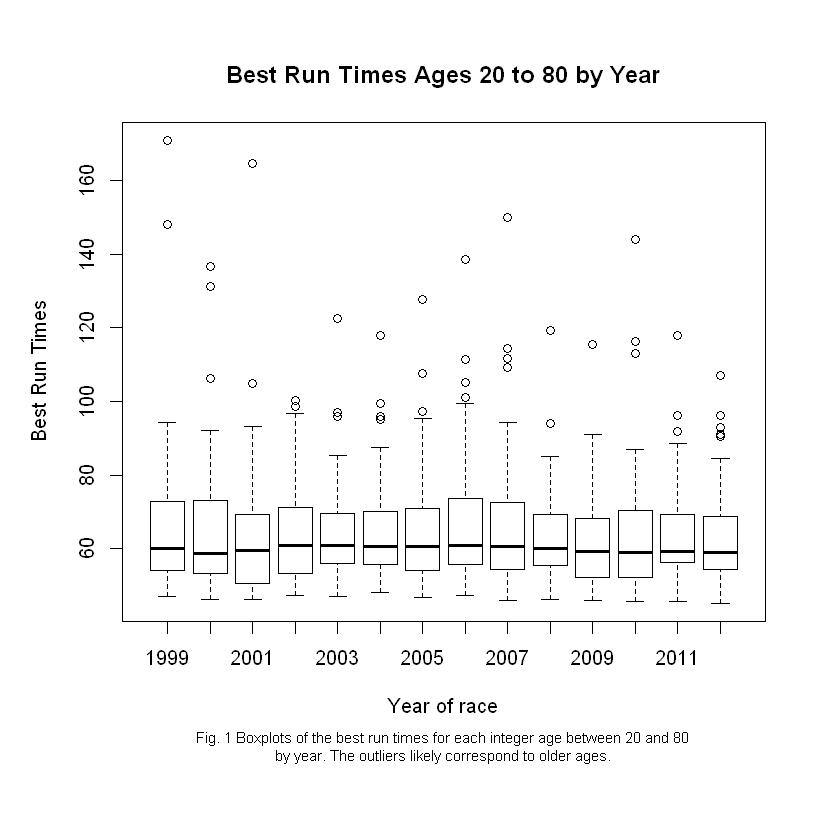

In [22]:
# ageCat = cut(df$age, breaks = seq(20, 30, 1))
par(oma=c(4,1,1,1))
boxplot(bestTimes$bestTime ~ bestTimes$year, xlab = "Year of race", ylab = "Best Run Times")
title("Best Run Times Ages 20 to 80 by Year")
mtext(paste("Fig. 1 Boxplots of the best run times for each integer age between 20 and 80\n",
            "by year. The outliers likely correspond to older ages.", sep=""), side=1, line=5, cex=0.75)

In [13]:
mods = lapply(1999:2012, function (x) loess(normTime ~ age, data = df[df$year==x,]))
names(mods) = 1999:2012

In [14]:
#now predict for each year
ages = 20:80
lo.prs = lapply(1999:2012, function (x) predict(mods[[as.character(x)]], newdata=data.frame(age = ages)))
names(lo.prs) = 1999:2012
head(lo.prs[["1999"]])

1        2        3        4        5        6 
1.619342 1.627017 1.633283 1.637935 1.640770 1.641581

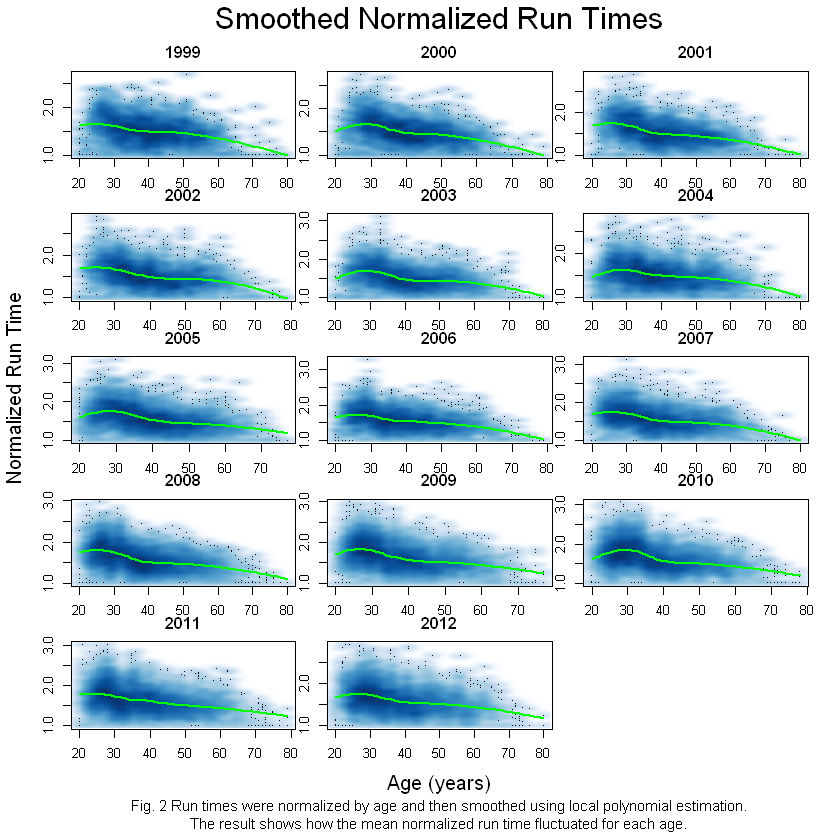

In [23]:
#now plot a few of them i guess
par(mfrow=c(5,3), mar=c(1,1,2.5,1), oma=c(6, 3.5, 2, 1))
for (yr in 1999:2012){
    smoothScatter(x = df[df$year == yr, "age"], y = df[df$year == yr, "normTime"])
    title(as.character(yr))
    lines(x = 20:80, y = lo.prs[[as.character(yr)]], col = "green", lwd = 2)
}
mtext("Smoothed Normalized Run Times", outer=TRUE, side=3, cex=1.5)
mtext("Age (years)", outer=TRUE, side=1, cex=1, line=2)
mtext("Normalized Run Time", outer=TRUE, side=2, cex=1, line=2)
mtext(paste("Fig. 2 Run times were normalized by age and then smoothed ", 
            "using local polynomial estimation.\nThe result shows how the ", 
            "mean normalized run time fluctuated for each age.", sep=""), outer=TRUE, side=1, cex=0.75, line=4.5)

#### Summary Statistics Comparison
Summary statistics for the two years in question. The output I have is a little different than the author's code because of the fact that we normalized by the best time for the age for each individual year.

The minima are equal to 1 as expected by the method of normalization, had we used an overall minimum for the age (irrespective of year) then we would expect our minima to be greater than or equal to one. The quantiles and max for 1999 are all lower than those for 2012 indicating that, while accounting for the best time by age for each individual year, the 1999 runners were faster than 2012.

In [16]:
#summary stats between 1999 and 2012
time99Norm = df[df$year == 1999, "normTime"]
time12Norm = df[df$year == 2012, "normTime"]
summary(time99Norm)

summary(time12Norm)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.316   1.493   1.511   1.682   2.689 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.400   1.598   1.626   1.819   2.921 

#### Density Comparison of 1999 and 2012
The density plots are generated in figure 3 and show almost normal distributions but with fatter right-tails. The location of their centers seem to indicate no statistically significant difference, we can test this formally using a t-test

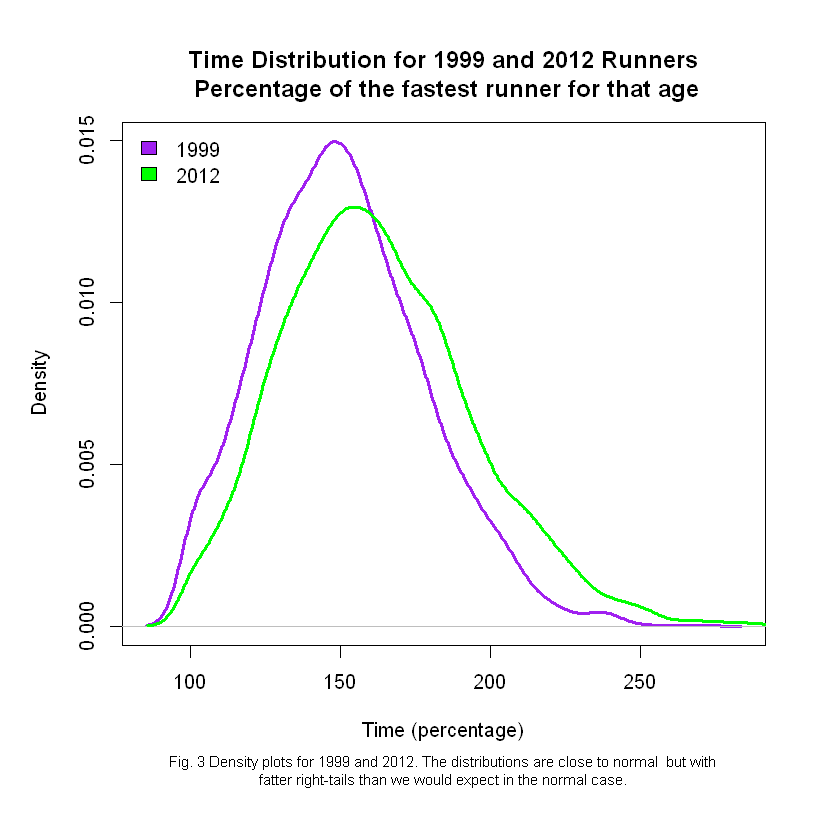

In [27]:
par(oma=c(3, 1, 1, 1))
plot(density(100*time99Norm, na.rm = TRUE), 
    # ylim = c(0, 0.05), 
     col = "purple",
     lwd = 3,  xlab = "Time (percentage)",
     main = "Time Distribution for 1999 and 2012 Runners\n Percentage of the fastest runner for that age")
lines(density(100*time12Norm, na.rm = TRUE), 
          lwd = 3, col = "green")
legend("topleft", fill = c("purple", "green"),
       legend = c("1999", "2012"), bty = "n")
mtext(paste("Fig. 3 Density plots for 1999 and 2012. The distributions are close to normal ",
            "but with\nfatter right-tails than we would expect in the normal case."), side=1, line=5, cex=0.75)

#### Inspecting Sample Quantiles for 1999 and 2012
Given the shifted but similar distributions shown in figure 3 we can expect the quantiles to match up on a mostly straight line but perhaps shifted. Figure 4 shows the qq-plot of the normalized times for 1999 and 2012 and the picture is what was expected however the qq-plot makes it exceptionally clear in what quantiles these two distributions differ, in this case it is around the 80<sup>th</sup> quantile.

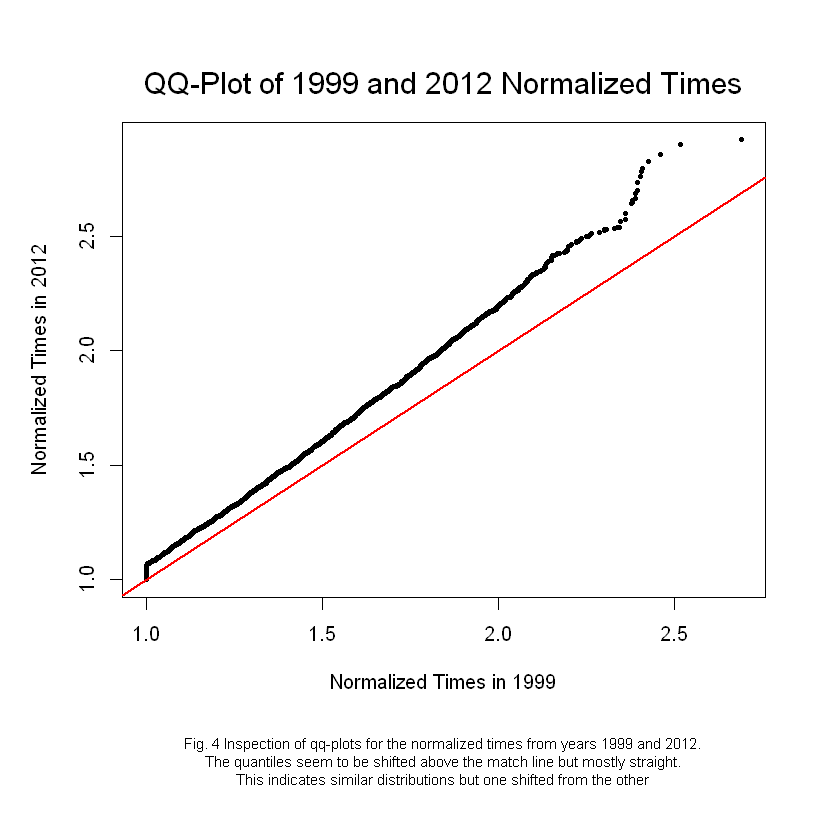

In [39]:
par(oma=c(5,1,1,1))
qqplot(df[df$year==1999,'normTime'], df[df$year==2012,'normTime'], pch = 19, cex = 0.5, 
       xlab = "Normalized Times in 1999",
       ylab = "Normalized Times in 2012")
abline(a =0, b = 1, col="red", lwd = 2)
mtext("QQ-Plot of 1999 and 2012 Normalized Times", side=3, line=1, cex=1.5)
mtext(paste("Fig. 4 Inspection of qq-plots for the normalized times from years 1999 and 2012.\n",
            "The quantiles seem to be shifted above the match line but mostly straight.\n",
            "This indicates similar distributions but one shifted from the other", sep=""), 
      side=1, line=7, cex=0.75)

## Results

## Conclusion

## References
[1] Kaplan, Daniel and Nolan, Deborah. Data Science in R: A Case Studies Approach, Chapter 2: Modeling Runners’ Times in the Cherry Blossom Race. 2015 Taylor & Francis Group, LLC.